In [144]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
gps_logs = pd.read_csv('../dataset/copilotovirtual_logs/20241006_1830_gps_data.csv')
gps_logs.head()

,latitud,longitud,velocidad,timestamp,distancia
0,-17.431345,-66.159476,0.000000,2024-10-06 18:30:28,0.000000
1,-17.431335,-66.159460,5.353931,2024-10-06 18:30:31,2.037466
2,-17.431337,-66.159447,3.576411,2024-10-06 18:30:34,1.401600
3,-17.431342,-66.159430,1.898990,2024-10-06 18:30:39,1.797738
4,-17.431328,-66.159431,0.269876,2024-10-06 18:30:44,1.530992


In [147]:
yolo_logs = pd.read_csv('../dataset/copilotovirtual_logs/20241006_1830_yolo_data.csv')
yolo_logs

,timestamp,clase,probabilidad,sound
0,1728253841822,zona-escolar,0.418776,0
1,1728253842292,zona-escolar,0.423445,0
2,1728253843623,zona-escolar,0.573912,0
3,1728253844077,zona-escolar,0.652020,0
4,1728253844544,zona-escolar,0.677219,0
...,...,...,...,...
62,1728254188297,zona-escolar,0.929871,1
63,1728254188775,zona-escolar,0.944141,1
64,1728254189419,zona-escolar,0.967001,1
65,1728254189931,zona-escolar,0.967421,1


In [148]:
yolo_logs['clase'].value_counts()


clase
zona-escolar                 35
pare                         17
ceda-el-paso                  7
paso-peatonal                 2
prohibido-girar-u             2
prohibido-girar-izquierda     1
prohibido-girar-derecha       1
limite-velocidad-35           1
limite-velocidad-30           1
Name: count, dtype: int64

<Axes: xlabel='clase'>

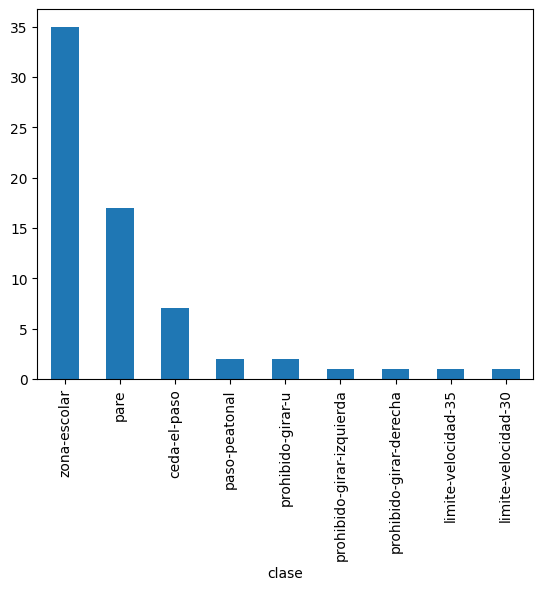

In [149]:
yolo_logs['clase'].value_counts().plot(kind='bar')

In [150]:
yolo_logs['clase'].describe()

count               67
unique               9
top       zona-escolar
freq                35
Name: clase, dtype: object

In [151]:
yolo_logs.dtypes

timestamp         int64
clase            object
probabilidad    float64
sound             int64
dtype: object

In [152]:
import pytz

yolo_logs_copia = yolo_logs.copy()

# convertir a datetime
local_timezone = pytz.timezone('America/La_Paz')

yolo_logs_copia['timestamp'] = pd.to_datetime(yolo_logs_copia['timestamp'], unit='ms', origin='unix', utc=True).dt.tz_convert(local_timezone)
yolo_logs_copia['date'] = pd.to_datetime(yolo_logs_copia['timestamp'], format='%Y-%m-%d').dt.date
yolo_logs_copia['time'] = pd.to_datetime(yolo_logs_copia['timestamp'], format='%H:%M:%S').dt.time
# yolo_logs_copia['date_time'] = pd.to_datetime(yolo_logs_copia['timestamp'], format='%Y-%m-%d %H:%M', errors='coerce', unit='s')
yolo_logs_copia['timestamp'] = yolo_logs_copia['timestamp'].dt.floor('s')
yolo_logs_copia['date_time'] = pd.to_datetime(yolo_logs_copia['timestamp'], format='%Y-%m-%d %H:%M', errors='coerce', unit='s')
yolo_logs_copia.drop(columns=['timestamp'], inplace=True)

yolo_logs_copia.set_index('date_time', inplace=True)

In [153]:
# yolo_logs_copia.set_index('timestamp_index', inplace=True)
yolo_logs_copia


,clase,probabilidad,sound,date,time
date_time,,,,,
2024-10-06 18:30:41-04:00,zona-escolar,0.418776,0,2024-10-06,18:30:41.822000
2024-10-06 18:30:42-04:00,zona-escolar,0.423445,0,2024-10-06,18:30:42.292000
2024-10-06 18:30:43-04:00,zona-escolar,0.573912,0,2024-10-06,18:30:43.623000
2024-10-06 18:30:44-04:00,zona-escolar,0.652020,0,2024-10-06,18:30:44.077000
2024-10-06 18:30:44-04:00,zona-escolar,0.677219,0,2024-10-06,18:30:44.544000
...,...,...,...,...,...
2024-10-06 18:36:28-04:00,zona-escolar,0.929871,1,2024-10-06,18:36:28.297000
2024-10-06 18:36:28-04:00,zona-escolar,0.944141,1,2024-10-06,18:36:28.775000
2024-10-06 18:36:29-04:00,zona-escolar,0.967001,1,2024-10-06,18:36:29.419000


In [3]:
# load 20241008_1447_gps_data.csv
gps_logs = pd.read_csv('../dataset/copilotovirtual_logs/20241008_1447_gps_data.csv')
gps_logs.head()

,latitud,longitud,velocidad,timestamp,distancia
0,-17.430080,-66.158892,25.668000,1728413275814,0.000000
1,-17.429804,-66.158880,27.726551,1728413278860,30.573956
2,-17.429580,-66.158926,16.984440,1728413283848,25.346788
3,-17.429463,-66.158925,11.261848,1728413288849,12.916181
4,-17.429427,-66.158930,10.442563,1728413291756,3.953706


In [4]:
gps_logs.describe()

,latitud,longitud,velocidad,timestamp,distancia
count,625.000000,625.000000,625.000000,6.250000e+02,625.000000
mean,-17.400794,-66.161048,20.296874,1.728415e+12,29.168925
std,0.017670,0.004933,15.766766,9.027038e+05,22.856373
min,-17.431445,-66.172262,0.150196,1.728413e+12,0.000000
25%,-17.414689,-66.164589,5.402945,1.728414e+12,7.178643
50%,-17.399687,-66.160154,18.732530,1.728415e+12,27.093689
75%,-17.385387,-66.158159,32.135735,1.728416e+12,45.716980
max,-17.372938,-66.149653,75.764990,1.728416e+12,129.231340


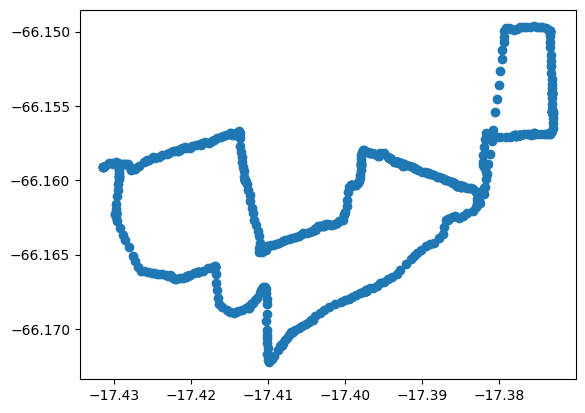

In [6]:
# draw a scatter plot
plt.scatter(gps_logs['latitud'], gps_logs['longitud'])
plt.show()

In [7]:
!pip install folium

In [8]:
# dibujar con la latitud y longitud en un mapa con folium
import folium


In [11]:
# create a map
m = folium.Map(location=[-16.5, -68.15], zoom_start=12)

# add points
for i in range(0, len(gps_logs)):
    folium.Marker([gps_logs.iloc[i]['latitud'], gps_logs.iloc[i]['longitud']]).add_to(m)
    
m.center = [-16.5, -68.15]

In [12]:
m